<a href="https://colab.research.google.com/github/Begum-Guney/python-linear-regression-example/blob/main/weather_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Install required packages (only needed in Google Colab)
!pip install kagglehub
!pip install seaborn

# Import necessary libraries
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Download the dataset from Kaggle
path = kagglehub.dataset_download("budincsevity/szeged-weather")
print("Path to dataset files:", path)

# Read the dataset (assumes the filename is 'weatherHistory.csv')
df = pd.read_csv(path + '/weatherHistory.csv')

# Preview the first few rows
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/budincsevity/szeged-weather/versions/1


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [12]:
# Select relevant columns: Humidity and Temperature (C)
df_model = df[['Humidity', 'Temperature (C)']].dropna()

# Define independent (X) and dependent (y) variables
X = df_model['Humidity']
y = df_model['Temperature (C)']

# Add a constant term to the model (required for intercept)
X_const = sm.add_constant(X)

# Create and fit the OLS regression model
model = sm.OLS(y, X_const).fit()

# Print full model summary with statistical details
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 6.423e+04
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        06:49:38   Log-Likelihood:            -3.2991e+05
No. Observations:               96453   AIC:                         6.598e+05
Df Residuals:                   96451   BIC:                         6.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6369      0.093    373.651      0.0

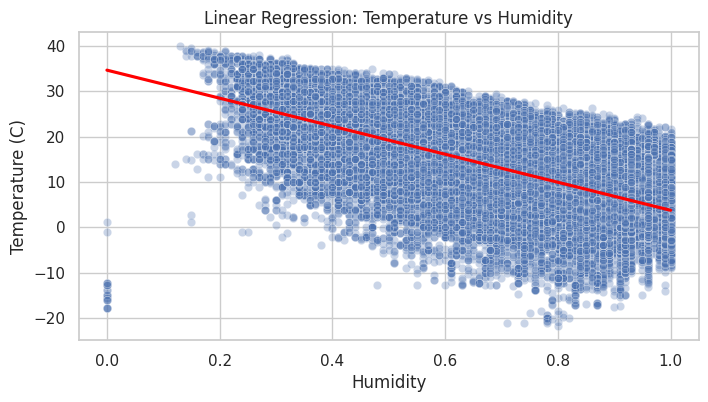

In [14]:
# Set seaborn style
sns.set(style="whitegrid")

# Create scatterplot with regression line
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Humidity', y='Temperature (C)', data=df_model, alpha=0.3)
sns.regplot(x='Humidity', y='Temperature (C)', data=df_model, scatter=False, color='red')
plt.title('Linear Regression: Temperature vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.show()